# 14.1 Statistical Functions

## 14.1.3 Correlation

In [20]:
frame = pd.DataFrame(np.random.randn(1000, 5), columns=['a', 'b', 'c', 'd','e'])

In [21]:
frame.iloc[::2] = np.nan

In [33]:
frame['b'][:10]

0         NaN
1    0.111787
2         NaN
3   -1.970171
4         NaN
5    0.703507
6         NaN
7   -0.688472
8         NaN
9   -0.766808
Name: b, dtype: float64

In [32]:
frame['a'].corr(frame['b'][:10])

-0.5187684991927455

从这里可以看出corr函数是支持两个长度不相同的serial进行运算的

In [26]:
frame['a'].corr(frame['b'], method='spearman')

0.03821573686294745

In [28]:
frame.corr()

,a,b,c,d,e
a,1.000000,0.043645,0.017586,-0.008695,0.018497
b,0.043645,1.000000,0.094459,0.005702,0.029671
c,0.017586,0.094459,1.000000,-0.106646,0.001692
d,-0.008695,0.005702,-0.106646,1.000000,0.076944
e,0.018497,0.029671,0.001692,0.076944,1.000000


使用corr方法需要注意的一点是参与运算的两个对象的index需要由重叠的地方，否则无法计算出结果，下面是写的一个小程序

In [34]:
index = ['a', 'b', 'c', 'd', 'e']
columns = ['one', 'two', 'three', 'four']
df1 = pd.DataFrame(np.random.randn(5, 4), index=index, columns=columns)
df2 = pd.DataFrame(np.random.randn(4, 4), index=index[:4], columns=columns)
df1.one.corr(df2.one)

0.34750472332674637

In [35]:
df2 = pd.DataFrame(np.random.randn(4, 4), columns=columns)#此时df2的index和df1的index不同
df1.one.corr(df2.one)

nan

In [36]:
df1.one.corrwith(df2.one)

AttributeError: 'Series' object has no attribute 'corrwith'

# 14.2 Window Functions

对于rolling操作，其实是有一个对应的`Rolling`来进行描述的，这就好比groupby操作类似，会生成`DataFrameGroupBy`类对象；

Starting in version 0.18.1, the rolling() and expanding() functions can be used directly from
DataFrameGroupBy objects, see the groupby docs.

从这段话可以看出，`Rolling`可以比`DataFrameGroupBy`操作更加细的粒度，即它既可以作用在一个完整的dataframe，也可以作用在一个比dataframe更加细的粒度上；


In [1]:
%matplotlib inline
from __future__ import division
from numpy.random import randn
import numpy as np
np.set_printoptions(precision=4, suppress=True)
import pandas as pd

D:\Program Files\Anaconda3\lib\importlib\_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
s = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000',periods=1000))
s

2000-01-01    0.668547
2000-01-02    1.035784
2000-01-03    0.464344
2000-01-04    1.273243
2000-01-05   -0.236302
2000-01-06   -0.359422
2000-01-07    2.747130
2000-01-08   -0.397208
2000-01-09   -0.581896
2000-01-10    1.433482
2000-01-11    0.173777
2000-01-12   -0.691947
2000-01-13   -0.643183
2000-01-14   -0.585105
2000-01-15    0.351880
2000-01-16   -0.824836
2000-01-17    0.805823
2000-01-18    1.600972
2000-01-19   -1.004235
2000-01-20    1.296335
2000-01-21   -0.642816
2000-01-22   -0.626503
2000-01-23   -0.118854
2000-01-24   -0.130540
2000-01-25   -0.526997
2000-01-26   -0.360575
2000-01-27    0.089155
2000-01-28   -1.160832
2000-01-29   -0.200365
2000-01-30   -0.192747
                ...   
2002-08-28    1.288991
2002-08-29   -0.872798
2002-08-30    0.039591
2002-08-31   -0.207860
2002-09-01   -0.153828
2002-09-02    0.009099
2002-09-03   -0.682532
2002-09-04   -0.685373
2002-09-05   -0.023955
2002-09-06   -0.105387
2002-09-07   -0.798970
2002-09-08   -0.909196
2002-09-09 

In [3]:
s = s.cumsum()
s

2000-01-01     0.668547
2000-01-02     1.704331
2000-01-03     2.168675
2000-01-04     3.441918
2000-01-05     3.205615
2000-01-06     2.846194
2000-01-07     5.593324
2000-01-08     5.196116
2000-01-09     4.614220
2000-01-10     6.047702
2000-01-11     6.221479
2000-01-12     5.529532
2000-01-13     4.886349
2000-01-14     4.301244
2000-01-15     4.653124
2000-01-16     3.828288
2000-01-17     4.634112
2000-01-18     6.235084
2000-01-19     5.230849
2000-01-20     6.527183
2000-01-21     5.884367
2000-01-22     5.257865
2000-01-23     5.139011
2000-01-24     5.008470
2000-01-25     4.481473
2000-01-26     4.120898
2000-01-27     4.210053
2000-01-28     3.049221
2000-01-29     2.848856
2000-01-30     2.656109
                ...    
2002-08-28   -11.286585
2002-08-29   -12.159383
2002-08-30   -12.119792
2002-08-31   -12.327652
2002-09-01   -12.481481
2002-09-02   -12.472382
2002-09-03   -13.154913
2002-09-04   -13.840286
2002-09-05   -13.864241
2002-09-06   -13.969628
2002-09-07   -14

In [8]:
r = s.rolling(window=60)
r

Rolling [window=60,center=False,axis=0]

我目前比较关注pandas中跟时序相关的内容，在文档中看到了这样的一段描述：
>Warning: The freq and how arguments were in the API prior to 0.18.0 changes. These are deprecated in the
new API. You can simply resample the input prior to creating a window function.
For example, instead of s.rolling(window=5,freq='D').max() to get the max value on a rolling 5 Day
window, one could use s.resample('D').max().rolling(window=5).max(), which first resamples
the data to daily data, then provides a rolling 5 day window.

这段话的意思是：从pandas0.18.0版本开始，rolling方法中移除了`freq`和`how`参数，在新版本的API中，它们是不建议使用的；在新版本中如果要实现和原来版本相同的功能，可以通过如下的方式得到：

旧版本写法:`s.rolling(window=5,freq='D').max() `

新版本写法：`s.resample('D').max().rolling(window=5).max()`

In [10]:
 r.mean()

2000-01-01           NaN
2000-01-02           NaN
2000-01-03           NaN
2000-01-04           NaN
2000-01-05           NaN
2000-01-06           NaN
2000-01-07           NaN
2000-01-08           NaN
2000-01-09           NaN
2000-01-10           NaN
2000-01-11           NaN
2000-01-12           NaN
2000-01-13           NaN
2000-01-14           NaN
2000-01-15           NaN
2000-01-16           NaN
2000-01-17           NaN
2000-01-18           NaN
2000-01-19           NaN
2000-01-20           NaN
2000-01-21           NaN
2000-01-22           NaN
2000-01-23           NaN
2000-01-24           NaN
2000-01-25           NaN
2000-01-26           NaN
2000-01-27           NaN
2000-01-28           NaN
2000-01-29           NaN
2000-01-30           NaN
                 ...    
2002-08-28   -158.858218
2002-08-29   -174.954974
2002-08-30   -191.013186
2002-08-31   -207.025348
2002-09-01   -223.005269
2002-09-02   -238.988094
2002-09-03   -255.002365
2002-09-04   -271.042340
2002-09-05   -287.075834


In [13]:
type(s.index)

pandas.tseries.index.DatetimeIndex

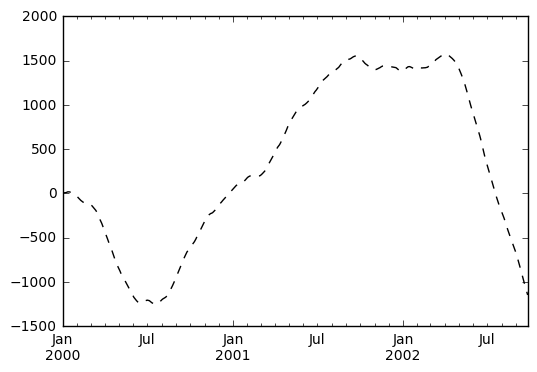

In [14]:
s.plot(style='k--')

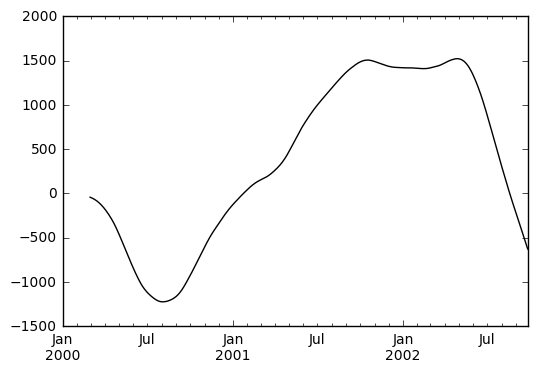

In [15]:
r.mean().plot(style='k')

在dataframe中使用windowfunction

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000E897BA8>,
      dtype=object)

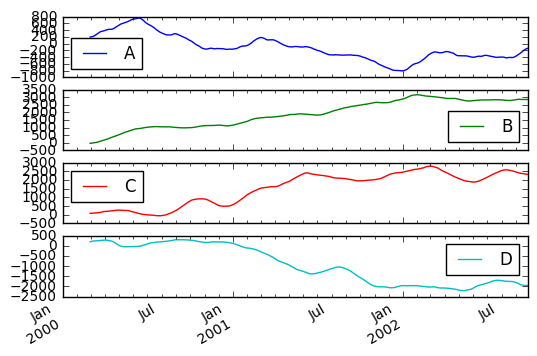

In [4]:
df = pd.DataFrame(np.random.randn(1000, 4),index=pd.date_range('1/1/2000', periods=1000),columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
df.rolling(window=60).sum().plot(subplots=True)

## 14.2.1 Method Summary

这一小节介绍了`Rolling`类提供的统计函数，`Rolling`类提供的统计函数都是一些常用的统计函数，那我们如果想要得到一些`Rolling`类提供的统计函数之外的功能要怎样做了？这一小节也对此进行了介绍。

要对`Rolling`对象实现自定义的功能，可以通过`apply`来实现

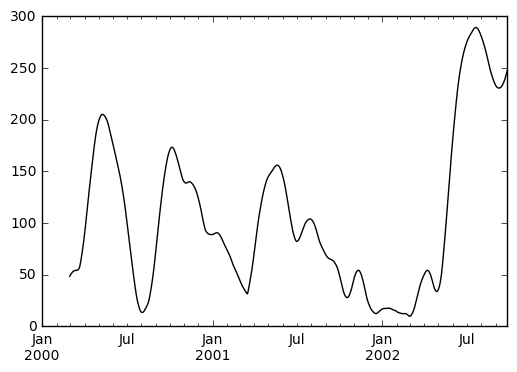

In [19]:
mad = lambda x: np.fabs(x - x.mean()).mean()
s.rolling(window=60).apply(mad).plot(style='k')

## 14.2.2 Rolling Windows

将win_type传递给.rolling会生成一个通用的滚动窗口计算，根据win_type进行加权。

关于win_type的解释可以参考下面的这个文章：https://stackoverflow.com/questions/42999175/what-is-the-intuition-behind-win-type-argument-in-rolling-function-of-pandas

这跟信号处理相关，我目前还不了解。并且pandas的win_type是参考的scipy的，https://docs.scipy.org/doc/scipy/reference/signal.html#window-functions

In [20]:
 ser = pd.Series(np.random.randn(10), index=pd.date_range('1/1/2000', periods=10))

In [21]:
 ser.rolling(window=5, win_type='triang').mean()

2000-01-01         NaN
2000-01-02         NaN
2000-01-03         NaN
2000-01-04         NaN
2000-01-05   -1.076368
2000-01-06   -0.425704
2000-01-07   -0.182924
2000-01-08    0.149150
2000-01-09    0.103785
2000-01-10    0.306055
Freq: D, dtype: float64

In [22]:
 ser.rolling(window=5, win_type='boxcar').mean()

2000-01-01         NaN
2000-01-02         NaN
2000-01-03         NaN
2000-01-04         NaN
2000-01-05   -0.892239
2000-01-06   -0.484419
2000-01-07   -0.452003
2000-01-08    0.231906
2000-01-09    0.175564
2000-01-10    0.252231
Freq: D, dtype: float64

In [23]:
 ser.rolling(window=5, win_type='gaussian').mean(std=0.1)

2000-01-01         NaN
2000-01-02         NaN
2000-01-03         NaN
2000-01-04         NaN
2000-01-05   -2.551513
2000-01-06    0.781083
2000-01-07   -0.419893
2000-01-08    0.672401
2000-01-09   -0.742092
2000-01-10    0.868029
Freq: D, dtype: float64

## 14.2.3 Time-aware Rolling

该功能是在pandas的 version 0.19.0版本中新增的，`rolling`方法新增了一个表示offset的参数

New in version 0.19.0 are the ability to pass an offset (or convertible) to a .rolling() method and have it produce
variable sized windows based on the passed time window. For each time point, this includes all preceding values
occurring within the indicated time delta.

This can be particularly useful for a non-regular time frequency index.

In [5]:
dft = pd.DataFrame({'B': [0, 1, 2, np.nan, 4]},index=pd.date_range('20130101 09:00:00', periods=5, freq='s'))
dft

,B
2013-01-01 09:00:00,0.0
2013-01-01 09:00:01,1.0
2013-01-01 09:00:02,2.0
2013-01-01 09:00:03,NaN
2013-01-01 09:00:04,4.0


This is a regular frequency index. Using an integer window parameter works to roll along the window frequency.

In [6]:
dft.rolling(2).sum()

,B
2013-01-01 09:00:00,NaN
2013-01-01 09:00:01,1.0
2013-01-01 09:00:02,3.0
2013-01-01 09:00:03,NaN
2013-01-01 09:00:04,NaN


In [7]:
dft.rolling(2, min_periods=1).sum()

,B
2013-01-01 09:00:00,0.0
2013-01-01 09:00:01,1.0
2013-01-01 09:00:02,3.0
2013-01-01 09:00:03,2.0
2013-01-01 09:00:04,4.0


Specifying an offset allows a more intuitive specification of the rolling frequency.

In [8]:
dft.rolling('2s').sum()

,B
2013-01-01 09:00:00,0.0
2013-01-01 09:00:01,1.0
2013-01-01 09:00:02,3.0
2013-01-01 09:00:03,2.0
2013-01-01 09:00:04,4.0


Using a non-regular, but still monotonic index, rolling with an integer window does not impart any special calculation.

In [9]:
dft = pd.DataFrame({'B': [0, 1, 2, np.nan, 4]},index = pd.Index([pd.Timestamp('20130101 09:00:00'),
                                                                 pd.Timestamp('20130101 09:00:02'),
                                                                 pd.Timestamp('20130101 09:00:02'),
                                                                 pd.Timestamp('20130101 09:00:05'),
                                                                 pd.Timestamp('20130101 09:00:06')],name='foo'))
dft

,B
foo,
2013-01-01 09:00:00,0.0
2013-01-01 09:00:02,1.0
2013-01-01 09:00:02,2.0
2013-01-01 09:00:05,NaN
2013-01-01 09:00:06,4.0


In [10]:
 dft.rolling(2).sum()

,B
foo,
2013-01-01 09:00:00,NaN
2013-01-01 09:00:02,1.0
2013-01-01 09:00:02,3.0
2013-01-01 09:00:05,NaN
2013-01-01 09:00:06,NaN


Using the time-specification generates variable windows for this sparse data.

In [11]:
dft.rolling('2s').sum()

,B
foo,
2013-01-01 09:00:00,0.0
2013-01-01 09:00:02,1.0
2013-01-01 09:00:02,3.0
2013-01-01 09:00:05,NaN
2013-01-01 09:00:06,4.0


Furthermore, we now allow an optional on parameter to specify a column (rather than the default of the index) in a
DataFrame.

In [12]:
dft = dft.reset_index()
dft

,foo,B
0,2013-01-01 09:00:00,0.0
1,2013-01-01 09:00:02,1.0
2,2013-01-01 09:00:02,2.0
3,2013-01-01 09:00:05,NaN
4,2013-01-01 09:00:06,4.0


In [13]:
dft.rolling('2s', on='foo').sum()

,foo,B
0,2013-01-01 09:00:00,0.0
1,2013-01-01 09:00:02,1.0
2,2013-01-01 09:00:02,3.0
3,2013-01-01 09:00:05,NaN
4,2013-01-01 09:00:06,4.0


## 14.2.4 Rolling Window Endpoints

New in version 0.20.0.

The inclusion of the interval endpoints in rolling window calculations can be specified with the closed parameter:


For example, having the right endpoint open is useful in many problems that require that there is no contamination
from present information back to past information. This allows the rolling window to compute statistics “up to that
point in time”, but not including that point in time.

这些内容都是和时序相关的；

In [14]:
df = pd.DataFrame({'x': 1},index = [pd.Timestamp('20130101 09:00:01'),
                                    pd.Timestamp('20130101 09:00:02'),
                                    pd.Timestamp('20130101 09:00:03'),
                                    pd.Timestamp('20130101 09:00:04'),
                                    pd.Timestamp('20130101 09:00:06')])
df            

,x
2013-01-01 09:00:01,1
2013-01-01 09:00:02,1
2013-01-01 09:00:03,1
2013-01-01 09:00:04,1
2013-01-01 09:00:06,1


In [15]:
df["right"] = df.rolling('2s', closed='right').x.sum() # default

df["both"] = df.rolling('2s', closed='both').x.sum()

df["left"] = df.rolling('2s', closed='left').x.sum()

In [44]:
df

,x
2013-01-01 09:00:01,1
2013-01-01 09:00:02,1
2013-01-01 09:00:03,1
2013-01-01 09:00:04,1
2013-01-01 09:00:06,1


Currently, this feature is only implemented for time-based windows. For fixed windows, the closed parameter cannot
be set and the rolling window will always have both endpoints closed.

## 14.2.5 Time-aware Rolling vs. Resampling

## 14.2.7 Binary Window Functions

In [38]:
df = pd.DataFrame(np.random.randn(1000, 4),index=pd.date_range('1/1/2000', periods=1000),columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
df2 = df[:20]

In [39]:
r=df2.rolling(window=5)
r.corr(df2['B'])

,A,B,C,D
2000-01-01,NaN,NaN,NaN,NaN
2000-01-02,NaN,NaN,NaN,NaN
2000-01-03,NaN,NaN,NaN,NaN
2000-01-04,NaN,NaN,NaN,NaN
2000-01-05,0.121289,1.0,0.742310,0.414836
2000-01-06,0.837543,1.0,0.463211,0.354510
2000-01-07,0.786672,1.0,-0.274098,-0.047046
2000-01-08,0.581424,1.0,-0.463683,-0.254108
2000-01-09,0.397150,1.0,-0.345762,-0.534885
2000-01-10,0.765657,1.0,0.773965,0.201838


In [40]:
df.corr(df2['B'])

D:\Program Files\Anaconda3\lib\site-packages\pandas\core\ops.py:1167: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


TypeError: invalid type comparison

## 14.2.8 Computing rolling pairwise covariances and correlations

In [16]:
covs = df[['B','C','D']].rolling(window=50).cov(df[['A','B','C']],pairwise=True)

KeyError: "['B' 'C' 'D'] not in index"